In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df=pd.read_csv("salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [5]:
df.shape

(73148, 11)

In [6]:
df['job_title'].value_counts()

job_title
Data Scientist                   11443
Data Engineer                     9405
Software Engineer                 7814
Data Analyst                      7334
Machine Learning Engineer         5807
                                 ...  
Lead AI Engineer                     1
Quantitative Research Analyst        1
CRM Data Analyst                     1
Applied Research Scientist           1
Marketing Data Scientist             1
Name: count, Length: 289, dtype: int64

In [7]:
data_scientist_data = df[df['job_title'].str.contains('Data Scientist', case=False, na=False)]

In [8]:
data_scientist_data.shape

(11489, 11)

In [9]:
df1 = pd.DataFrame(data_scientist_data)

experience_level ={'EN':1,'MI':2,'SE':3,'EX':4}
df1['experience_level']=df1['experience_level'].map(experience_level )

df1.tail(2)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73145,2020,1,FT,Data Scientist,105000,USD,105000,US,100,US,S
73147,2021,3,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


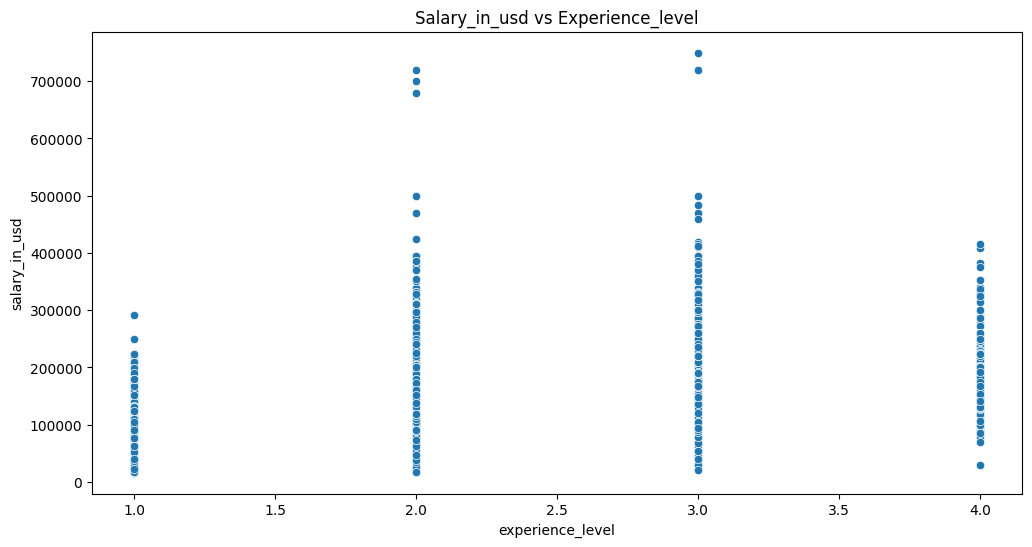

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='experience_level',y='salary_in_usd',data=df1)
plt.title('Salary_in_usd vs Experience_level')
plt.xlabel("experience_level")
plt.ylabel('salary_in_usd')
plt.show()

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


<Axes: >

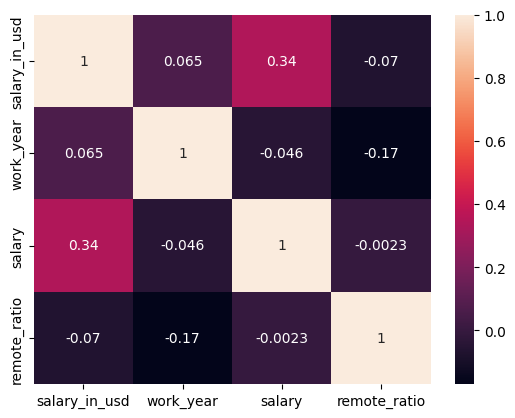

In [12]:
df=df[["salary_in_usd","work_year","salary","remote_ratio"]]

corr=df.corr()
sns.heatmap(corr,annot=True)

<Axes: >

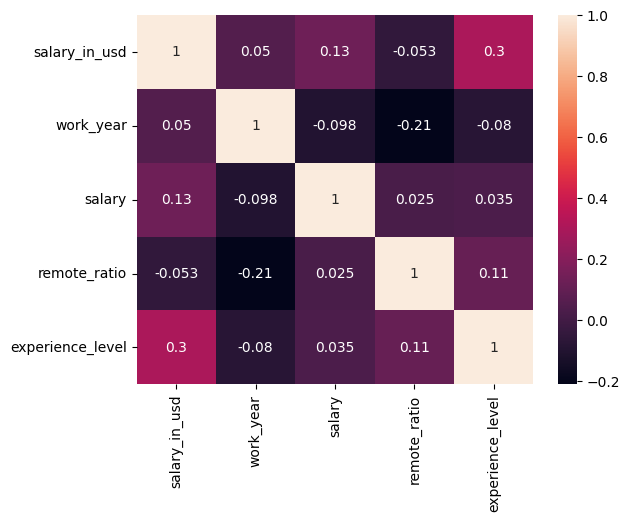

In [13]:
df1=df1[["salary_in_usd","work_year","salary","remote_ratio",'experience_level']]

corr=df1.corr()
sns.heatmap(corr,annot=True)

Highest Salary (USD): 750000
Lowest Salary (USD): 16000
Average Salary (USD): 158013.3337975455


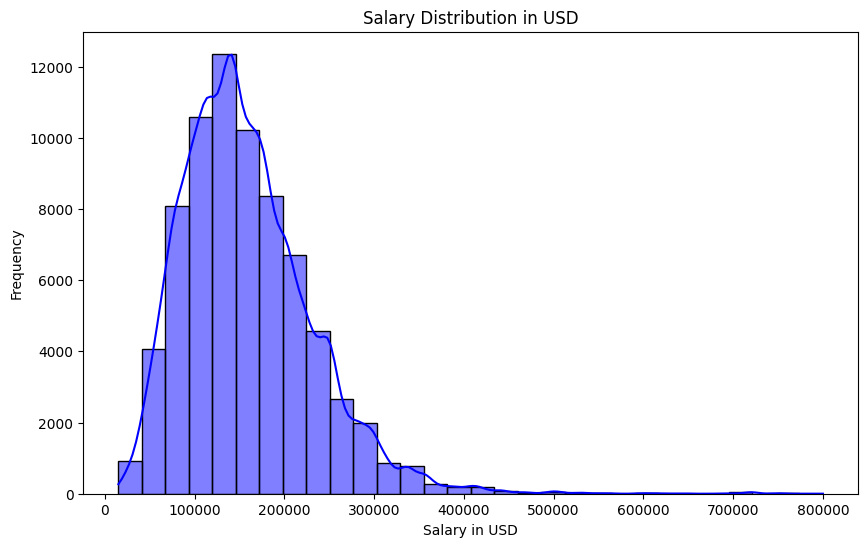

In [14]:
highest_salary = df1['salary_in_usd'].max()
lowest_salary = df1['salary_in_usd'].min()
average_salary = df1['salary_in_usd'].mean()


print(f"Highest Salary (USD): {highest_salary}")
print(f"Lowest Salary (USD): {lowest_salary}")
print(f"Average Salary (USD): {average_salary}")


plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

plt.show()

Highest Salary (USD): 750000
Lowest Salary (USD): 16000
Average Salary (USD): 158013.3337975455


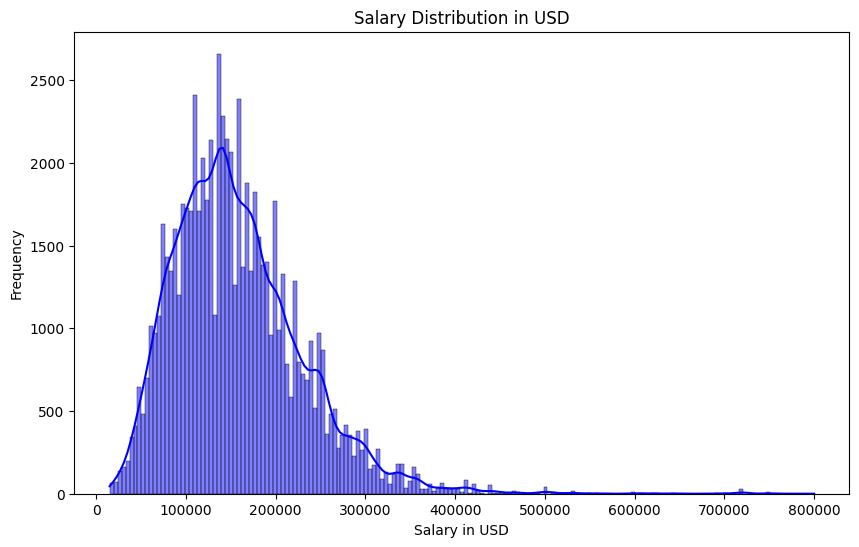

In [15]:
highest_salary = df1['salary_in_usd'].max()
lowest_salary = df1['salary_in_usd'].min()
average_salary = df1['salary_in_usd'].mean()


print(f"Highest Salary (USD): {highest_salary}")
print(f"Lowest Salary (USD): {lowest_salary}")
print(f"Average Salary (USD): {average_salary}")


plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='blue')
plt.title('Salary Distribution in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

plt.show()

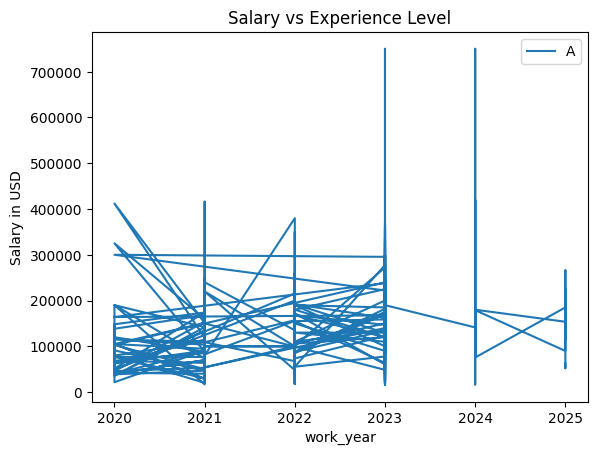

In [16]:
plt.plot(df1['work_year'],df1['salary_in_usd'])
plt.xlabel('work_year')
plt.ylabel('Salary in USD')
plt.title('Salary vs Experience Level')

plt.legend("ABCDEF",ncol=2,loc="upper right")

plt.show()
